In [ ]:
import zipfile
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# opening the zip csv file
zip_path = 'dataset/Alzheimer_s_Disease_and_Healthy_Aging_Data_20241126.zip'
with zipfile.ZipFile(zip_path, 'r') as z:
    print("Files in zip:", z.namelist())
    csv_file = z.namelist()[0]
    with z.open(csv_file) as f:
        df = pd.read_csv(f)
df.head()

Files in zip: ['Alzheimer_s_Disease_and_Healthy_Aging_Data_20241126.csv']


,RowId,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,BRFSS~2022~2022~42~Q03~TMC01~AGE~RACE,2022,2022,PA,Pennsylvania,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Native Am/Alaskan Native,POINT (-77.86070029 40.79373015),C05,TMC01,Q03,42,AGE,5064,RACE,NAA
1,BRFSS~2022~2022~46~Q03~TMC01~AGE~RACE,2022,2022,SD,South Dakota,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Asian/Pacific Islander,POINT (-100.3735306 44.35313005),C05,TMC01,Q03,46,AGE,65PLUS,RACE,ASN
2,BRFSS~2022~2022~16~Q03~TMC01~AGE~RACE,2022,2022,ID,Idaho,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-114.36373 43.68263001),C05,TMC01,Q03,16,AGE,65PLUS,RACE,BLK
3,BRFSS~2022~2022~24~Q03~TMC01~AGE~RACE,2022,2022,MD,Maryland,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,"Black, non-Hispanic",POINT (-76.60926011 39.29058096),C05,TMC01,Q03,24,AGE,65PLUS,RACE,BLK
4,BRFSS~2022~2022~55~Q03~TMC01~AGE~GENDER,2022,2022,WI,Wisconsin,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,...,Male,POINT (-89.81637074 44.39319117),C05,TMC01,Q03,55,AGE,65PLUS,GENDER,MALE


In [ ]:
# Grouping based on class and storing in different sheet in an excel
grouped = df.groupby('Class')
class_dfs = {class_name: group.reset_index(drop=True) for class_name, group in grouped}
output_directory = 'output' 
os.makedirs(output_directory, exist_ok=True)
output_file = os.path.join(output_directory, 'class_data_combined.xlsx')
with pd.ExcelWriter(output_file, engine='xlsxwriter') as writer:
    for class_name, class_df in class_dfs.items():
        print(f"Sheet created for Class: {class_name}")
        sheet_name = str(class_name)[:31].replace(' ', '_').replace('/', '_')  # Remove spaces and slashes
        class_df.to_excel(writer, sheet_name=sheet_name, index=False)
print(f"Data saved to {output_file}")

Sheet created for Class: Caregiving
Sheet created for Class: Cognitive Decline
Sheet created for Class: Mental Health
Sheet created for Class: Nutrition/Physical Activity/Obesity
Sheet created for Class: Overall Health
Sheet created for Class: Screenings and Vaccines
Sheet created for Class: Smoking and Alcohol Use
Data saved to output\class_data_combined.xlsx


## How do caregiving statistics differ by topic across different locations?

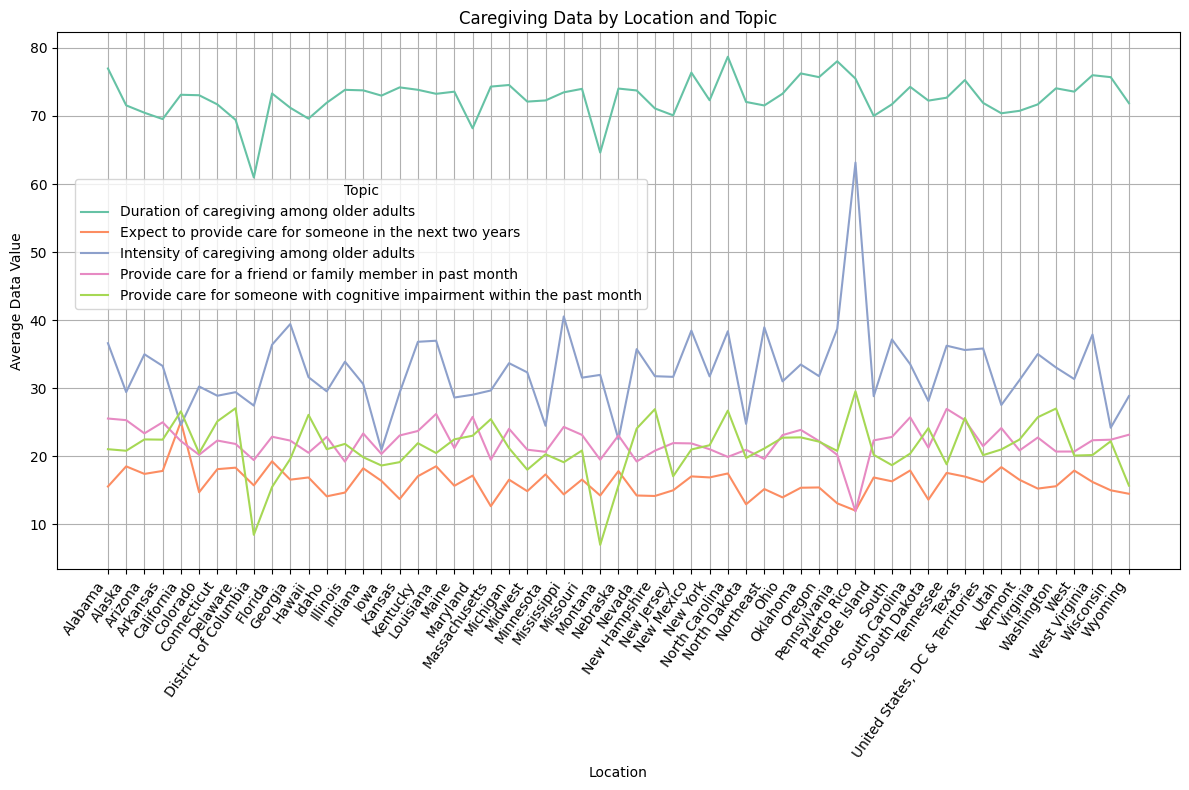

In [ ]:
# from the output taking the caregiving sheet
df = pd.read_excel('output/class_data_combined.xlsx',sheet_name='Caregiving')
df_filtered = df[['LocationDesc', 'Topic', 'Data_Value']]
grouped_data = df_filtered.groupby(['LocationDesc', 'Topic'])['Data_Value'].mean().reset_index()
plt.figure(figsize=(12, 8))
sns.lineplot(data=grouped_data, x='LocationDesc', y='Data_Value', hue='Topic', errorbar=None, palette='Set2')
plt.grid()
plt.title('Caregiving Data by Location and Topic')
plt.xlabel('Location')
plt.ylabel('Average Data Value')
plt.xticks(rotation=55, ha='right')
plt.legend(title='Topic', bbox_to_anchor=(0.01, 0.74), loc='upper left', ncol=1)
plt.tight_layout()
plt.show()